# EDA,visualization and predicting price 

## Introduction
In this project we are going to explore a dataset with room prices in neighbourhoods in Amsterdam. To make it simple we are going to visualize correlations between prices and parameters that we will use for predicting prices. The goal of project is to predict prices based on the best parameters we found.


# Exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.95,1,123
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,236,1,339,2020-04-09,2.58,2,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.14,1,33
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,2020-07-25,2.01,1,219
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.68,2,346


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18522 non-null  int64  
 1   name                            18489 non-null  object 
 2   host_id                         18522 non-null  int64  
 3   host_name                       18467 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   18522 non-null  object 
 6   latitude                        18522 non-null  float64
 7   longitude                       18522 non-null  float64
 8   room_type                       18522 non-null  object 
 9   price                           18522 non-null  int64  
 10  minimum_nights                  18522 non-null  int64  
 11  number_of_reviews               18522 non-null  int64  
 12  last_review                     

In [4]:
df2=df.drop(["neighbourhood_group"],axis=1)

Since there is no values in column "neighbourhood_group" we will just drop it. We can see that columns "last_review" and  "reviews_per_month" have missing values so we will explore them.

In [5]:
df2.isnull().sum()

id                                   0
name                                33
host_id                              0
host_name                           55
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2375
reviews_per_month                 2375
calculated_host_listings_count       0
availability_365                     0
dtype: int64

We can see that columns "last_review" and "reviews_per_month" have over 2000 indentical missing values which is correct because number of reviews are 0 which means nobody has looked at it. We can drop column "last review" and add 0 in column "reviews_per_month" because everything that divides with 0 is 0.

In [6]:
df3=df2.drop(["last_review"],axis=1)
df3["reviews_per_month"].fillna(0,inplace=True)
df3.isnull().sum()

id                                 0
name                              33
host_id                            0
host_name                         55
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

We have 33 missing values in "name" column and 55 missing values in "host_name" column. Because number of missing value is small we can just drop those rows.

In [7]:
df4=df3.dropna()
df4.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df4.shape

(18434, 14)

In [9]:
count_room=df4["room_type"].value_counts()
print("Private room counts:\n",count_room)
print("\n")
count_neighbourhood=df4["neighbourhood"].value_counts()
print("Neighbourhood counts: \n",count_neighbourhood)

Private room counts:
 Entire home/apt    14353
Private room        3888
Hotel room           141
Shared room           52
Name: room_type, dtype: int64


Neighbourhood counts: 
 De Baarsjes - Oud-West                    3057
De Pijp - Rivierenbuurt                   2296
Centrum-West                              2010
Centrum-Oost                              1580
Westerpark                                1394
Zuid                                      1329
Oud-Oost                                  1178
Bos en Lommer                             1058
Oostelijk Havengebied - Indische Buurt     880
Oud-Noord                                  592
Watergraafsmeer                            533
IJburg - Zeeburgereiland                   440
Slotervaart                                416
Noord-West                                 376
Noord-Oost                                 259
Buitenveldert - Zuidas                     248
Geuzenveld - Slotermeer                    213
De Aker - Nieuw Sloten 

We can see that we have less then 1% hotel rooms and shared rooms so i will categorize them into "other" and later remove them from data. Also i will group same neighbourhoods in one like Bijlmer-Centrum and Bijlmer-Oost and then categorize name of neighbourhoods that are less then 200 with "other".

In [10]:
df5=df4.copy()

In [11]:
#Categorize room types that are less then 150 into "other" category
room_stats=df5["room_type"].value_counts()
room_type_less=room_stats[room_stats<150]
df5.room_type=df5.room_type.apply(lambda x: "other" if x in room_type_less else x)
df5["room_type"].value_counts()

Entire home/apt    14353
Private room        3888
other                193
Name: room_type, dtype: int64

In [12]:
#Creating column with grouped neighbourhood
df5['neighbourhoods'] = df5['neighbourhood'].str.replace("Bijlmer-Centrum","Bijlmer").str.replace("Bijlmer-Oost","Bijlmer").str.replace("Centrum-West","Centrum").str.replace("Centrum-Oost","Centrum").str.replace("Oud-Oost","Oud").str.replace("Oud-Noord","Oud").str.replace("Noord-West","Noord").str.replace("Noord-Oost","Noord")
df5['neighbourhoods'].value_counts()

Centrum                                   3590
De Baarsjes - Oud-West                    3057
De Pijp - Rivierenbuurt                   2296
Oud                                       1770
Westerpark                                1394
Zuid                                      1329
Bos en Lommer                             1058
Oostelijk Havengebied - Indische Buurt     880
Noord                                      635
Watergraafsmeer                            533
IJburg - Zeeburgereiland                   440
Slotervaart                                416
Buitenveldert - Zuidas                     248
Geuzenveld - Slotermeer                    213
Bijlmer                                    202
De Aker - Nieuw Sloten                     128
Osdorp                                     126
Gaasperdam - Driemond                      119
Name: neighbourhoods, dtype: int64

In [13]:
df6=df5.copy()

In [14]:
#Categorize room types that are less then 150 into "other" category
neighbourhoods_stats=df6["neighbourhoods"].value_counts()
neighbourhoods_less=neighbourhoods_stats[neighbourhoods_stats<200]
df6.neighbourhoods=df6.neighbourhoods.apply(lambda x: "other" if x in neighbourhoods_less else x)
df6["neighbourhoods"].value_counts()

Centrum                                   3590
De Baarsjes - Oud-West                    3057
De Pijp - Rivierenbuurt                   2296
Oud                                       1770
Westerpark                                1394
Zuid                                      1329
Bos en Lommer                             1058
Oostelijk Havengebied - Indische Buurt     880
Noord                                      635
Watergraafsmeer                            533
IJburg - Zeeburgereiland                   440
Slotervaart                                416
other                                      373
Buitenveldert - Zuidas                     248
Geuzenveld - Slotermeer                    213
Bijlmer                                    202
Name: neighbourhoods, dtype: int64

## Cleaning dataset

In [15]:
df6.shape

(18434, 15)

In [16]:
df6["price"].describe()

count    18434.000000
mean       154.041445
std        149.403473
min          0.000000
25%         94.000000
50%        128.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x11c89148>,
 'caps': [<matplotlib.lines.Line2D at 0x11c894a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c46f70>],
 'medians': [<matplotlib.lines.Line2D at 0x11c89808>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c89988>],
 'means': []}

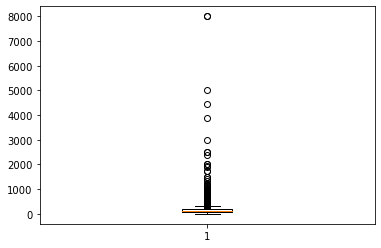

In [17]:
#visualize outliers with boxplot
plt.boxplot(df6['price'])

In [18]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=180 + 1.5*(180-94)
max_threshold


309.0

In [19]:
# Removing outliers
df7=df6[df6.price<max_threshold]
# recalculate summary statistics
df7['price'].describe()

count    17461.000000
mean       134.359773
std         59.947190
min          0.000000
25%         90.000000
50%        125.000000
75%        170.000000
max        308.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12a6e1a8>,
 'caps': [<matplotlib.lines.Line2D at 0x12a6e508>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a61fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12a6e868>],
 'fliers': [<matplotlib.lines.Line2D at 0x12a6e9e8>],
 'means': []}

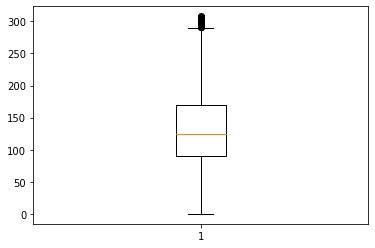

In [20]:
plt.boxplot(df7['price'])

Even though we set our max threshold we can still see that we have outliers. So we will search further until we remove all of them.

In [21]:
#Calculating new max threshold
max_threshold=180 + 1.5*(180-123)
max_threshold

265.5

In [22]:
# Removing outliers
df7=df6[df6.price<max_threshold]

{'whiskers': [<matplotlib.lines.Line2D at 0x12ba2118>,
 'caps': [<matplotlib.lines.Line2D at 0x12ba2478>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b95f40>],
 'medians': [<matplotlib.lines.Line2D at 0x12ba27d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ba2958>],
 'means': []}

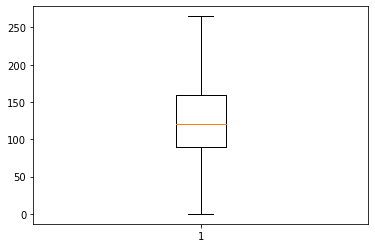

In [23]:
plt.boxplot(df7['price'])

We removed all outliers and now we can move one.

In [24]:
df7.shape

(16849, 15)

### Availability per year


In [25]:
# lenght of unique values 
len(df7["availability_365"].unique())

360

In [26]:
#number of unique values
availability=df7.groupby("availability_365")["availability_365"].agg("count").sort_values(ascending=False)
availability

availability_365
0      11819
365      294
364      175
89       144
346      143
       ...  
113        1
124        1
225        1
228        1
93         1
Name: availability_365, Length: 360, dtype: int64

Since we have a more then 12 000 rooms that are not available we are going to drop this column because we are looking for rooms that are available. Droping rows with value 0 in column would be mistake because we would lose over 70% data.

###  Number of reviews 

In [27]:
# lenght of unique values
len(df7["number_of_reviews"].unique())

416

In [28]:
df7["number_of_reviews"].describe()

count    16849.000000
mean        25.244940
std         56.703634
min          0.000000
25%          2.000000
50%          8.000000
75%         23.000000
max        858.000000
Name: number_of_reviews, dtype: float64

In [29]:
df7.shape

(16849, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x12aa9478>,
 'caps': [<matplotlib.lines.Line2D at 0x12aa97d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12aa92c8>],
 'medians': [<matplotlib.lines.Line2D at 0x12aa9b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x12aa9cb8>],
 'means': []}

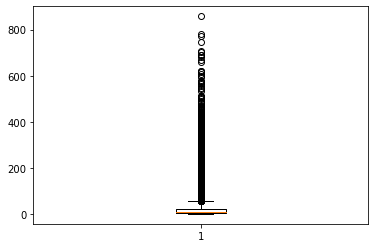

In [30]:
#visualize outliers with boxplot
plt.boxplot(df7['number_of_reviews'])

In [31]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=23 + 1.5*(23 - 2)
max_threshold

54.5

In [32]:
len(df7[df7.number_of_reviews>max_threshold])

1725

We can see that if we remove outliers from "number_of_reviews" column we would lost almost 2000 data. That is more then 10% data so we will just drop this column.

### Minimum nights

In [33]:
df7["minimum_nights"].describe()

count    16849.000000
mean         3.518428
std         13.815091
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12adc658>,
 'caps': [<matplotlib.lines.Line2D at 0x12adc9b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12adc4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x12adcd18>],
 'fliers': [<matplotlib.lines.Line2D at 0x12adce98>],
 'means': []}

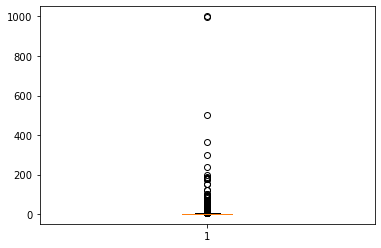

In [34]:
#visualize outliers with boxplot
plt.boxplot(df7['minimum_nights'])

In [35]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=3 + 1.5*(3 - 2)
max_threshold

4.5

In [36]:
len(df7[df7.minimum_nights>max_threshold])

2107

We can see that if we remove outliers from "minimum_nights" column we would lost more then 2000 data. That is more then 10% data so we will just drop this column.

In [37]:
df7["calculated_host_listings_count"].describe()

count    16849.000000
mean         2.273013
std          7.278007
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: calculated_host_listings_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12b0aad8>,
 'caps': [<matplotlib.lines.Line2D at 0x12b0ae38>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b0a928>],
 'medians': [<matplotlib.lines.Line2D at 0x12b141c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b14340>],
 'means': []}

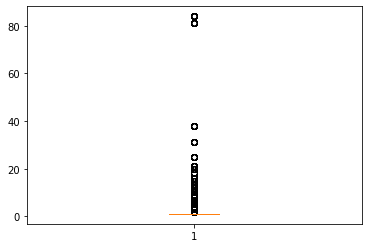

In [38]:
#visualize outliers with boxplot
plt.boxplot(df7['calculated_host_listings_count'])

In [39]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=1 + 1.5*(1-1)
max_threshold

1.0

In [40]:
len(df7[df7.calculated_host_listings_count>max_threshold])

3416

We can see that if we remove outliers from "calculated_host_listings_count column we would lost almost 3500 data. That is more then 20% data so we will just drop this column.

# Data Visualization

### Locations by neighborhood

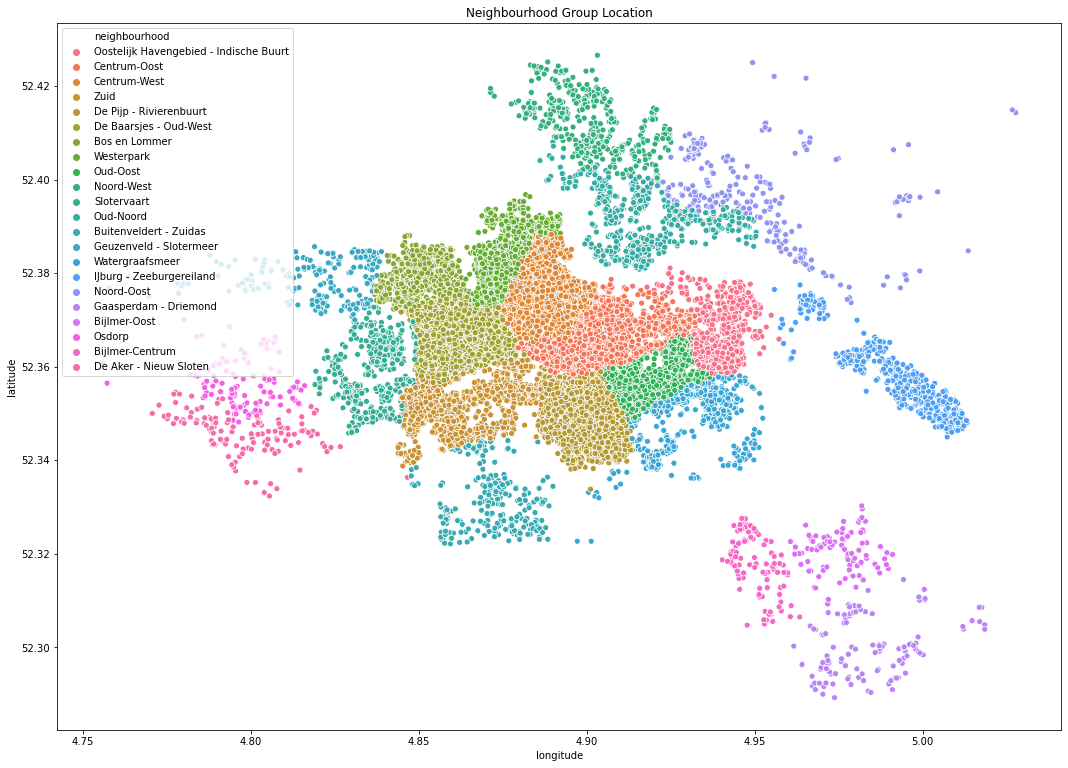

In [41]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(18,13))
sns.scatterplot(df4.longitude,df4.latitude,hue=df4.neighbourhood).set_title(title)
plt.ioff()

Above we can see neighbourhoods by it's location.

### Areas of the city categorized by price

### Room type locations

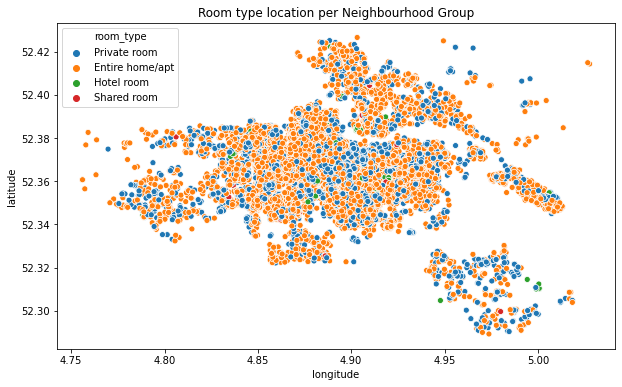

In [42]:
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df4.longitude,df4.latitude,hue=df4.room_type).set_title(title)
plt.ioff()

From diagram abave we can see that there are most private rooms and entire homes.

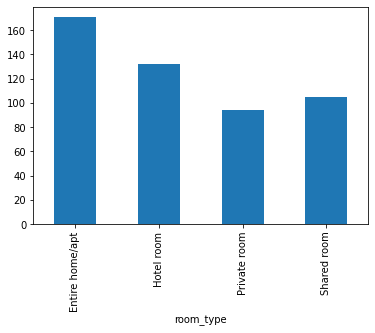

In [43]:
#Showing average price based on room type
df4.groupby('room_type')['price'].mean().plot.bar()
plt.show()

We can see from above that entire homes or apartmants are the most expensive and shared rooms are cheapest which is logic.

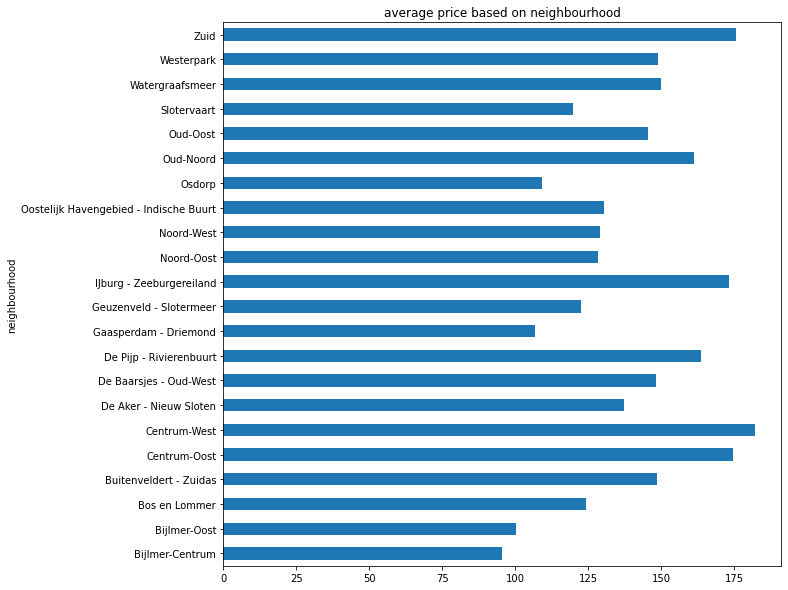

In [44]:
plt.figure(figsize=(10,10))
df4.groupby("neighbourhood")["price"].mean().plot.barh(title="average price based on neighbourhood")
plt.show()

In [45]:
#droping columns that have too many outliers and are irrelevant
df8=df7.drop(["id","name","host_id","host_name","reviews_per_month","availability_365","number_of_reviews","calculated_host_listings_count","minimum_nights","neighbourhood"],axis=1)
df8.head(10)

,latitude,longitude,room_type,price,neighbourhoods
0,52.36575,4.94142,Private room,59,Oostelijk Havengebied - Indische Buurt
1,52.36509,4.89354,Private room,236,Centrum
2,52.37297,4.88339,Entire home/apt,125,Centrum
3,52.38761,4.89188,Private room,135,Centrum
4,52.36610,4.88953,Private room,75,Centrum
5,52.36607,4.89100,Private room,55,Centrum
6,52.35132,4.84838,Entire home/apt,219,Zuid
7,52.37891,4.88321,Entire home/apt,160,Centrum
8,52.37537,4.88932,Entire home/apt,211,Centrum
9,52.35746,4.86124,Entire home/apt,67,Zuid


In [46]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16849 entries, 0 to 18521
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        16849 non-null  float64
 1   longitude       16849 non-null  float64
 2   room_type       16849 non-null  object 
 3   price           16849 non-null  int64  
 4   neighbourhoods  16849 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 658.2+ KB


In [47]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [48]:
df9=create_dummies(df8,"neighbourhoods")
df10=df9.drop(["neighbourhoods"],axis=1)

df11=create_dummies(df10,"room_type")
df12=df11.drop(["room_type"],axis=1)

df12.head()

,latitude,longitude,price,neighbourhoods_Bijlmer,neighbourhoods_Bos en Lommer,neighbourhoods_Buitenveldert - Zuidas,neighbourhoods_Centrum,neighbourhoods_De Baarsjes - Oud-West,neighbourhoods_De Pijp - Rivierenbuurt,neighbourhoods_Geuzenveld - Slotermeer,...,neighbourhoods_Oostelijk Havengebied - Indische Buurt,neighbourhoods_Oud,neighbourhoods_Slotervaart,neighbourhoods_Watergraafsmeer,neighbourhoods_Westerpark,neighbourhoods_Zuid,neighbourhoods_other,room_type_Entire home/apt,room_type_Private room,room_type_other
0,52.36575,4.94142,59,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,52.36509,4.89354,236,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,52.37297,4.88339,125,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,52.38761,4.89188,135,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,52.36610,4.88953,75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df13=df12.drop(["neighbourhoods_other","room_type_other"],axis=1)

In [50]:
# correlations by MD
df13.corr()

,latitude,longitude,price,neighbourhoods_Bijlmer,neighbourhoods_Bos en Lommer,neighbourhoods_Buitenveldert - Zuidas,neighbourhoods_Centrum,neighbourhoods_De Baarsjes - Oud-West,neighbourhoods_De Pijp - Rivierenbuurt,neighbourhoods_Geuzenveld - Slotermeer,neighbourhoods_IJburg - Zeeburgereiland,neighbourhoods_Noord,neighbourhoods_Oostelijk Havengebied - Indische Buurt,neighbourhoods_Oud,neighbourhoods_Slotervaart,neighbourhoods_Watergraafsmeer,neighbourhoods_Westerpark,neighbourhoods_Zuid,room_type_Entire home/apt,room_type_Private room
latitude,1.000000,-0.145939,0.013018,-0.300769,0.197860,-0.240335,0.165527,0.021854,-0.323253,0.087282,-0.066961,0.463740,0.003172,0.053541,-0.057267,-0.179733,0.296138,-0.231168,0.016480,-0.017030
longitude,-0.145939,1.000000,0.012774,0.218049,-0.262758,-0.055988,0.069097,-0.337206,0.087792,-0.211886,0.428865,0.173333,0.311192,0.266483,-0.224550,0.194309,-0.114560,-0.213427,-0.045469,0.043202
price,0.013018,0.012774,1.000000,-0.082483,-0.057228,-0.012723,0.076855,0.015884,0.050682,-0.041819,0.020471,-0.035941,-0.049361,0.006107,-0.063483,-0.008117,0.021186,0.025422,0.447490,-0.434638
neighbourhoods_Bijlmer,-0.300769,0.218049,-0.082483,1.000000,-0.027554,-0.012702,-0.051533,-0.048690,-0.040385,-0.012068,-0.016547,-0.020990,-0.024833,-0.035641,-0.016852,-0.018747,-0.031340,-0.029205,-0.080453,0.083145
neighbourhoods_Bos en Lommer,0.197860,-0.262758,-0.057228,-0.027554,1.000000,-0.029890,-0.121272,-0.114580,-0.095037,-0.028400,-0.038940,-0.049395,-0.058439,-0.083872,-0.039658,-0.044117,-0.073752,-0.068726,0.054613,-0.050842
neighbourhoods_Buitenveldert - Zuidas,-0.240335,-0.055988,-0.012723,-0.012702,-0.029890,1.000000,-0.055903,-0.052818,-0.043809,-0.013091,-0.017950,-0.022770,-0.026939,-0.038663,-0.018281,-0.020337,-0.033997,-0.031681,-0.007976,0.008617
neighbourhoods_Centrum,0.165527,0.069097,0.076855,-0.051533,-0.121272,-0.055903,1.000000,-0.214294,-0.177744,-0.053114,-0.072827,-0.092381,-0.109296,-0.156862,-0.074171,-0.082510,-0.137935,-0.128536,-0.124424,0.117255
neighbourhoods_De Baarsjes - Oud-West,0.021854,-0.337206,0.015884,-0.048690,-0.114580,-0.052818,-0.214294,1.000000,-0.167936,-0.050184,-0.068809,-0.087284,-0.103265,-0.148207,-0.070078,-0.077957,-0.130324,-0.121443,0.055790,-0.052528
neighbourhoods_De Pijp - Rivierenbuurt,-0.323253,0.087792,0.050682,-0.040385,-0.095037,-0.043809,-0.177744,-0.167936,1.000000,-0.041624,-0.057072,-0.072397,-0.085652,-0.122929,-0.058126,-0.064661,-0.108096,-0.100730,0.046482,-0.041272
neighbourhoods_Geuzenveld - Slotermeer,0.087282,-0.211886,-0.041819,-0.012068,-0.028400,-0.013091,-0.053114,-0.050184,-0.041624,1.000000,-0.017055,-0.021634,-0.025595,-0.036734,-0.017369,-0.019322,-0.032302,-0.030101,-0.033990,0.033488


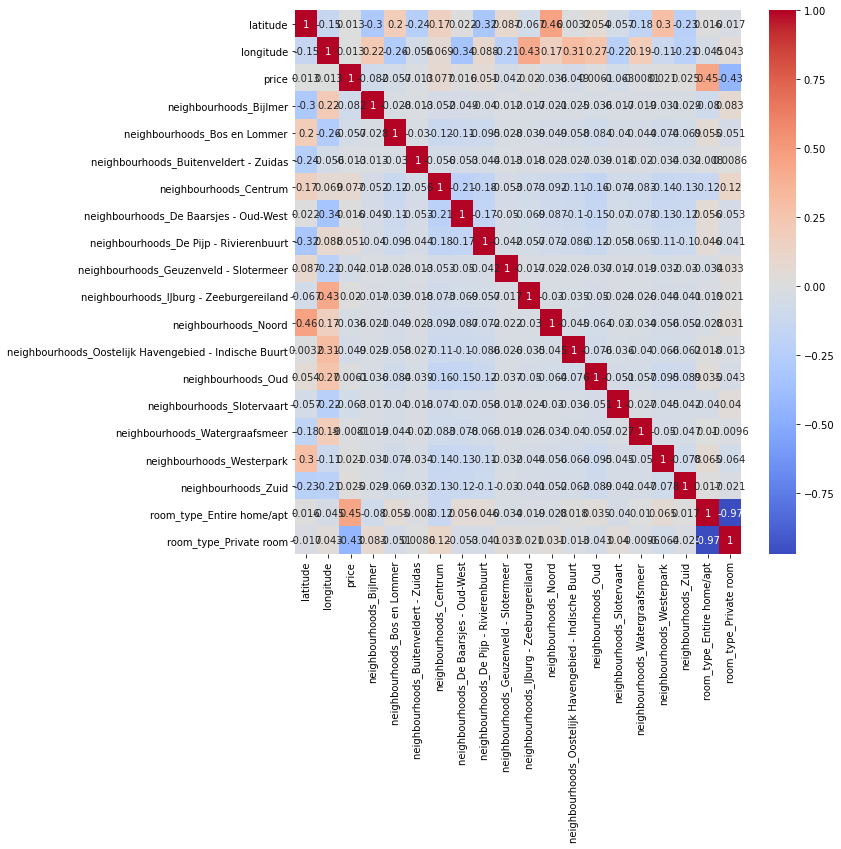

In [51]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df13.corr(), annot=True, cmap='coolwarm')

Everything looks fine and we can now build our model for predicting price.

In [52]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16849 entries, 0 to 18521
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   latitude                                               16849 non-null  float64
 1   longitude                                              16849 non-null  float64
 2   price                                                  16849 non-null  int64  
 3   neighbourhoods_Bijlmer                                 16849 non-null  uint8  
 4   neighbourhoods_Bos en Lommer                           16849 non-null  uint8  
 5   neighbourhoods_Buitenveldert - Zuidas                  16849 non-null  uint8  
 6   neighbourhoods_Centrum                                 16849 non-null  uint8  
 7   neighbourhoods_De Baarsjes - Oud-West                  16849 non-null  uint8  
 8   neighbourhoods_De Pijp - Rivierenbuurt        

## Scaling

In [53]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler=MinMaxScaler()

In [54]:
data_scaled_array=scaler.fit_transform(df13)

In [55]:
df14=pd.DataFrame(data_scaled_array, columns=df13.columns)
df14.head()

,latitude,longitude,price,neighbourhoods_Bijlmer,neighbourhoods_Bos en Lommer,neighbourhoods_Buitenveldert - Zuidas,neighbourhoods_Centrum,neighbourhoods_De Baarsjes - Oud-West,neighbourhoods_De Pijp - Rivierenbuurt,neighbourhoods_Geuzenveld - Slotermeer,neighbourhoods_IJburg - Zeeburgereiland,neighbourhoods_Noord,neighbourhoods_Oostelijk Havengebied - Indische Buurt,neighbourhoods_Oud,neighbourhoods_Slotervaart,neighbourhoods_Watergraafsmeer,neighbourhoods_Westerpark,neighbourhoods_Zuid,room_type_Entire home/apt,room_type_Private room
0,0.557069,0.682539,0.222642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.552262,0.506348,0.890566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.609658,0.468997,0.471698,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.716294,0.500239,0.509434,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.559618,0.491592,0.283019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Building Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


In [57]:
# First we need to separate target column from features
X=df14.drop(["price"],axis=1)
y=df14["price"]

train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=1)



### Linear Regression 

In [58]:
lr=LinearRegression()

In [59]:
#fitting the model
lr.fit(train_X,train_y)

LinearRegression()

In [60]:
#predicting values on test set
predictions=lr.predict(test_X)


### Calculating root mean squared error

In [61]:
test_mse=mean_squared_error(predictions,test_y)
test_rmse=test_mse**(1/2)
test_rmse

0.17543683540168006

In [62]:
df = pd.DataFrame({'Actual': test_y, 
                   'Predicted': predictions})
df.head(20)

,Actual,Predicted
13553,0.471698,0.471546
9829,0.471698,0.544901
7427,0.754717,0.592073
10062,0.150943,0.257534
10944,0.754717,0.463041
15712,0.177358,0.332150
4412,0.301887,0.532365
10441,0.305660,0.305549
10349,0.283019,0.379299
183,0.528302,0.550589


As we can see from the results we've got, the RMSE is 0.1755. For better results RMSE should be as lower as it can. 
From the table above we have "Actual" and "Predicted" prices. We can see that some results are accurate,some are very close and some are way too far.This could mean that we don't have balance dataset which means we need more information for certain parameters.For example there is more then 13 000 values for home/apartment room type and only 3 000 for private rooms. This is example of unbalance. We also have prices in same neighbourhood that vary between 5 euros and 120 euros. We  have one room that costs 5 euros and few from 10 to 30 euros the rest are between 50 and 120 so this could be reason why we got that results. To get  better results the number of values should be as equal as possible and dataset should contain more information.   
